<a href="https://colab.research.google.com/github/ankitoscar/handsonml/blob/main/chapter_11/chapter_material.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Building an image classifier using the Sequential API 
Here, we will make an image classifier using keras' Sequential API. The image classifier would be made for the Fashion MNIST dataset which has 70,000 grayscales of different fashion items having size 28 x 28.

In [31]:
# Importing libraries 
import tensorflow as tf 
from tensorflow import keras 
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


In [32]:
# Loading the Fashion MNIST dataset 
fashion_mnist = keras.datasets.fashion_mnist # Utility function for loading 
                                             # common dataset 
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
                                            # Splitting data into train and test

In [33]:
# Shapes and datatype of dataset 
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [34]:
# Dividing the full training dataset to a train and valid set with scaling 
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255
                  # Dividing by 255 to scale the input 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [35]:
# Making labels list 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
class_names[y_train[0]] # Class of y_train[0]

'Coat'

In [36]:
# Making the neural network using Sequential API 
model = keras.models.Sequential() # Initialising the model 
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax')) # Output layer

In [37]:
# Summary of the model showing layers, types, trainable and non-trainable parameters
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_19 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Compiling the model 
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

In [39]:
# Training and evaluating the model 
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0012 - accuracy: 0.6805 - val_loss: 0.5010 - val_accuracy: 0.8336
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5036 - accuracy: 0.8243 - val_loss: 0.4403 - val_accuracy: 0.8506
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4538 - accuracy: 0.8416 - val_loss: 0.4225 - val_accuracy: 0.8522
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4209 - accuracy: 0.8500 - val_loss: 0.4018 - val_accuracy: 0.8632
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3950 - accuracy: 0.8603 - val_loss: 0.3744 - val_accuracy: 0.8718
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3792 - accuracy: 0.8654 - val_loss: 0.3861 - val_accuracy: 0.8686
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3616 - accuracy: 0.8727 - val_loss: 0.3622 - val_accuracy:

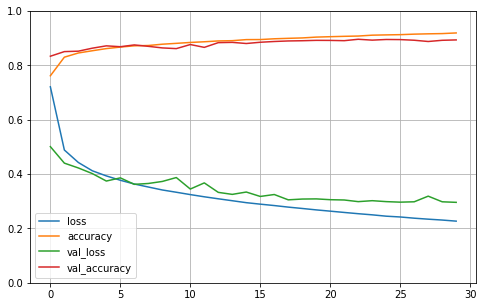

In [40]:
# Plotting the parameters of the trained model 

# Importing libraries 
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe of the history object 
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Set vertical range from 0-1
plt.show()

In [41]:
# Evaluating the model 
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 63.8217 - accuracy: 0.8451


[63.821693420410156, 0.8450999855995178]

The model has performed with an accuracy of 86% on the test set, which shows that the model is able to generalise easily.

In [42]:
# Predicting on data using the model 

# Importing numpy 
import numpy as np

print(model.predict(X_test[:3]))
y_pred = model.predict_classes(X_test[:3])
print(np.array(class_names)[y_pred])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
['Ankle Boot' 'Pullover' 'Trouser']


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## Building a Regression model using the Sequential API
Here, we will make a regression model on the California housing problem using a neural network. This is a simpler dataset as it has only numerical values in stored in columns.

In [43]:
# Importing dataset from Scikit-Learn
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Loading the dataset using utility function 
housing = fetch_california_housing()

# Splitting the data into train, test and valid sets 
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data
                                                              , housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

# Initialising scaler to scale the data 
scaler = StandardScaler() 

# Scaling the data 
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [44]:
# Making the model 
model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu', input_shape = X_train.shape[1:]),
        keras.layers.Dense(1)
])

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='sgd')

history = model.fit(X_train, y_train, epochs=20,
                    validation_data = (X_valid, y_valid))

# Evaluating 
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test[:3])
print(y_pred)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3281 - val_loss: 1.1616
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.2852 - val_loss: 0.5077
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4665 - val_loss: 0.4642
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4498 - val_loss: 0.4500
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3925 - val_loss: 0.4457
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3819 - val_loss: 0.4194
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3733 - val_loss: 0.4464
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4137 - val_loss: 0.4311
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3753 - val_loss: 0.4145
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3694 - val_loss: 0.4141

## Building complex models using the Functional API
Keras also has another API called Functional API, which can be used to create non-sequential models. Here, we will make one such model using it.

### Wide and Deep Network
This neural network tries to create two paths between input and output as to obtain output via a long and a short path.

In [45]:
# Making a wide and deep network 
_input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(_input_) # Using Functional API
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([_input_, hidden2]) # Creating long and short path
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[_input_], outputs=[output])

In [46]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 30)           270         input_7[0][0]                    
__________________________________________________________________________________________________
dense_24 (Dense)                (None, 30)           930         dense_23[0][0]                   
__________________________________________________________________________________________________
concatenate_4 (Concatenate)     (None, 38)           0           input_7[0][0]                    
                                                                 dense_24[0][0]             

In [47]:
# Compiling the model 
model.compile(loss='mean_squared_error', optimizer='sgd')

# Training the model 
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2648 - val_loss: 4.6976
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.3278 - val_loss: 93.7802
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [=========================

In [48]:
# Predicting on test data 
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test[:3])
print(y_pred)

162/162 [==============================] - 0s 794us/step - loss: nan
[[nan]
 [nan]
 [nan]]


We can also configure the neural network to take different subsets of features in different paths and then give the output.

In [49]:
# Making a network to take different features in different paths 
input_A = keras.layers.Input(shape = [5])
input_B = keras.layers.Input(shape = [6])
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [50]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_26 (Dense)                (None, 30)           210         input_9[0][0]                    
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_27 (Dense)                (None, 30)           930         dense_26[0][0]                   
____________________________________________________________________________________________

In [51]:
# Compiling the model 
model.compile(loss='mse', optimizer='sgd')

# Modifying input shapes of data 
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

# Training the model 
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A,X_valid_B), y_valid))
# Evaluating 
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2986 - val_loss: 0.8496
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6403 - val_loss: 0.5643
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5119 - val_loss: 0.5184
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4774 - val_loss: 0.5094
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4557 - val_loss: 0.4800
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4281 - val_loss: 0.4663
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4265 - val_loss: 0.4609
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4067 - val_loss: 0.4516
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3889 - val_loss: 0.4485
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3941 - val_loss: 0.4331

In [52]:
# Making a neural network to give more than one output 
input_A = keras.layers.Input(shape = [5])
input_B = keras.layers.Input(shape = [6])
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2) # auxilary output 
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [53]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_29 (Dense)                (None, 30)           210         input_11[0][0]                   
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_30 (Dense)                (None, 30)           930         dense_29[0][0]                   
____________________________________________________________________________________________

In [54]:
# Compiling the model 
model.compile(loss = ['mse', 'mse'],loss_weights=[0.9, 0.1], optimizer = 'sgd')

# Training the model 
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data = ([X_valid_A, X_valid_B], [y_valid, y_valid])
)

# Getting all losses
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test]
)

print(total_loss, main_loss, aux_loss)

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.9730 - dense_31_loss: 1.8198 - dense_32_loss: 3.3513 - val_loss: 1.3523 - val_dense_31_loss: 1.3453 - val_dense_32_loss: 1.4151
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9589 - dense_31_loss: 0.9212 - dense_32_loss: 1.2980 - val_loss: 27.7902 - val_dense_31_loss: 29.5598 - val_dense_32_loss: 11.8637
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: nan - dense_31_loss: nan - dense_32_loss: nan - val_loss: nan - val_dense_31_loss: nan - val_dense_32_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: nan - dense_31_loss: nan - dense_32_loss: nan - val_loss: nan - val_dense_31_loss: nan - val_dense_32_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: nan - dense_31_loss: nan - dense_32_loss: nan - val_loss: nan - val_dense_31_loss: nan - val_dense_32_loss: nan
Epoch 6/20
363/363 [===========

## Building a model using Subclassing API
In, this method we can wrap our model around a class which can help us to do operations on it like loops, if-statements, etc.

In [56]:
# Building a model with Subclassing API
class WideAndDeep(keras.models.Model):
  def __init__(self, units=30, activation='relu', **kwargs): # constructor
    super().__init__(**kwargs)
    self.hidden1 = keras.layers.Dense(units, activation=activation)
    self.hidden2 = keras.layers.Dense(units, activation=activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)

  def call(self, inputs):
    input_A, input_B = inputs 
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    
    return main_output, aux_output

model = WideAndDeep()